Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning Discussion
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO. 5** | **Line and Circle Detection**
**Name** | Montojo, Lance M.
**Section** | CPE31S3
**Date Performed**: | 02/21/2025
**Date Submitted**: | 02/21/2025
**Instructor**: |Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


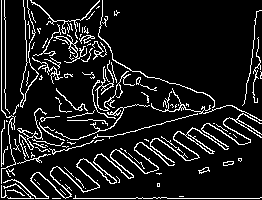

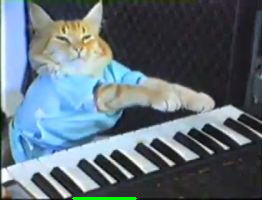

In [ ]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/CPE 313/Images/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

*Answers*

1. The code "minLineLength = 20" is the one responsilbe for setting the minimum line length.

2. The mathematical formula for Hough transform in regards of line is:

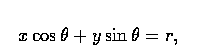

where r is the distance of the line from the origin and theta is the angle between this perpendicular and the x-axis.

Reference: https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/OWENS/LECT6/node3.html

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

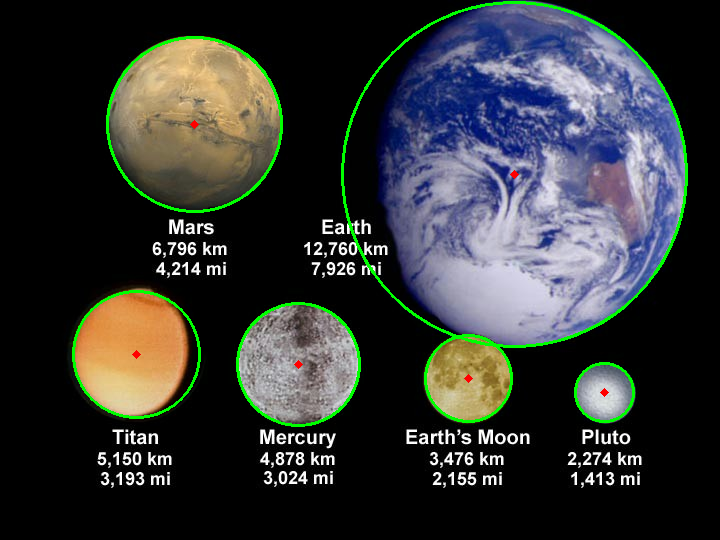

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 15

planets = cv2.imread('/content/drive/MyDrive/CPE 313/Images/Planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

When you run the code with the n value of 5, it has numerous circles being identified and a red dot at the middle but it does not properly detect the circle shape of the planets and thus it is not accurate.

Change the value to 9, **what happens to the image**?

It is now better than when the value is 5 as it properly detects some planets like Mercury, Mars, Pluto, and the Earth's Moon. Some circles also disappeared when the n value is set to 9.

Lastly, change the value to 15, **what can you say about the resulting image?**

It is now accurate and properly detects the shape of the planets.

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

By experimenting with the n value, it can be said that if n is too low, noise can interfere with detection resulting in an inaccurate results. The line cv2.medianBlur() function smooths the image and reduces noise before circle detection before applying the HoughCircle() function.

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

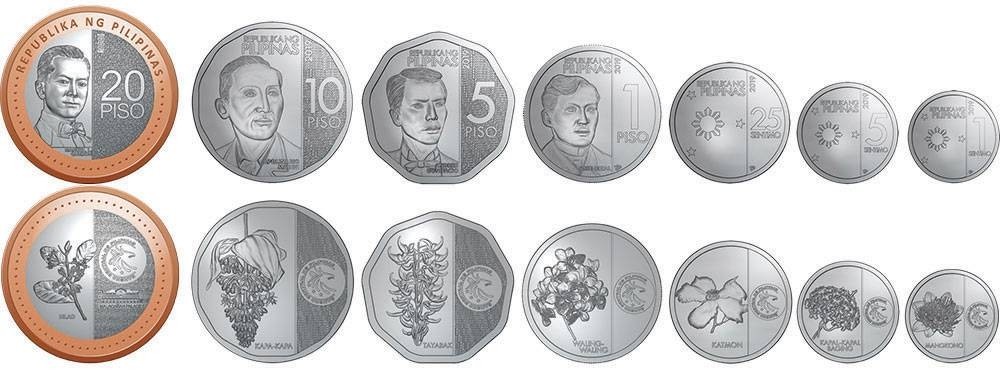

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

Number of lines: 451
Number of circles: 0


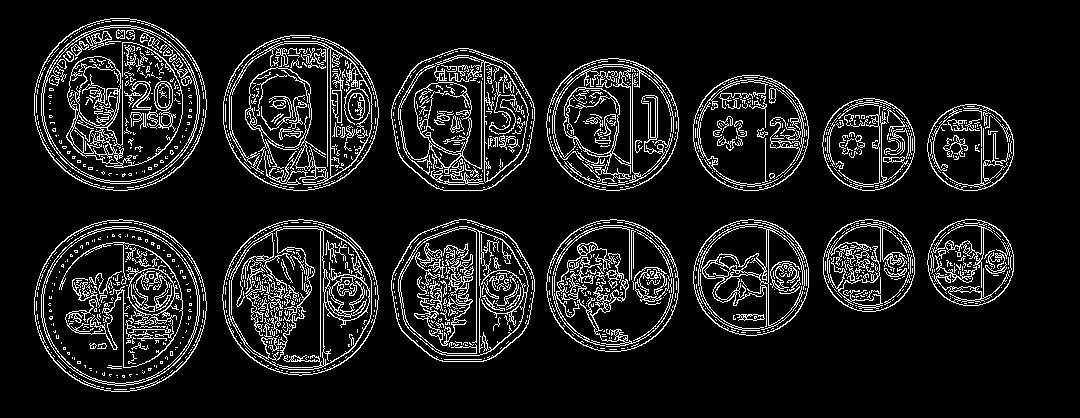

In [ ]:
# Line detection
img = cv2.imread('/content/drive/MyDrive/CPE 313/Images/PH-coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
mask = np.zeros_like(gray)

print(f"Number of lines: {len(lines)}")
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

contours, x = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of circles: {len(contours)}")

cv2_imshow(edges)

The function detected the coins and outputted it through lines and detected how many lines there are but it does not counted how many coins/circles there are. Using Houghlines(), it can not count circles using the function as they have different formulas with the lines' formula being:

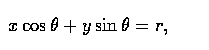

and the circle formula being:

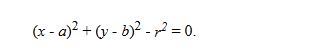

It can be observed that the line formula has 2 parameters, whereas the circle formula needs 3 parameters.

Reference:  https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/OWENS/LECT6/node3.html

Number of circles detected (HoughCircles): 14


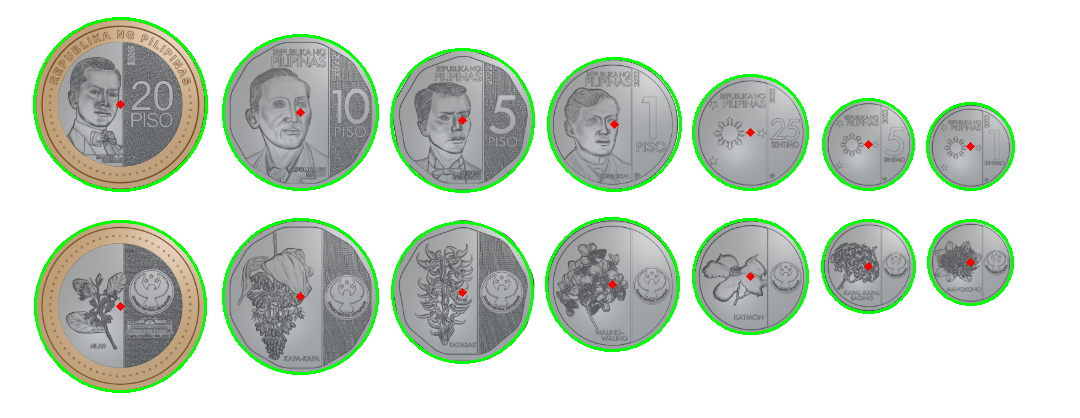

In [ ]:
# Circle Detection function.
n = 15
PH_coins = cv2.imread('/content/drive/MyDrive/CPE 313/Images/PH-coins.png')
gray_img = cv2.cvtColor(PH_coins, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1, 50,
                            param1=100,param2=30,minRadius=10,
                                maxRadius=100)

circles = np.uint16(np.around(circles))
print(f"Number of circles detected (HoughCircles): {len(circles[0])}")
for i in circles[0, :]:
    # Draw the outer circle
    cv2.circle(PH_coins, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # Draw the center of the circle
    cv2.circle(PH_coins, (i[0], i[1]), 2, (0, 0, 255), 3)

cv2.imwrite("PH_coins_circles.jpg", PH_coins)
cv2_imshow(PH_coins)

It accurately detects the shape of Philippine coins after passing the image to the HoughCircles() function, and yes you can use HoughCircles() function to count the number of circles (in this case the number of Philippine coins).

## 5. Summary, Conclusions and Lessons Learned

This activity taught me about line and circle detection using HoughLines() and HoughCircles() and introduced me to the extended work of Paul Hough by Peter Hart and Richard Duda. Practical examples, like detecting shapes in images of cats and planets, demonstrated how parameter tuning affects accuracy. By adjusting values of the minimum distance between the centers of detected circles (the value of 50 in HoughCircles()), we successfully detected Philippine coins. I learned that fine-tuning parameters is crucial for precise shape recognition. This activity enhanced my understanding of computer vision and the importance of optimization in image processing.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*